#CIFAR10

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
!cd  /content/drive/MyDrive/

In [4]:
# ls drive/MyDrive/Colab\ Notebooks/MachineLearningCourseWithPython/data/course_data_18_jan_2026/

In [8]:
from tensorflow.keras.datasets import cifar10

In [10]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [11]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
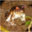

In [12]:
x_train[0]

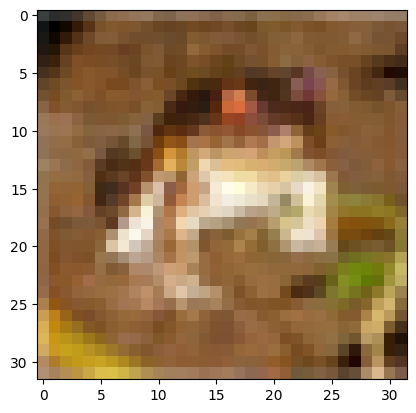

In [13]:
plt.imshow(x_train[0])

In [14]:
x_train=x_train/255
x_test=x_test/255

In [15]:
x_test.shape

(10000, 32, 32, 3)

In [17]:
#y_test

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
y_cat_train=to_categorical(y_train,10)
y_cat_test=to_categorical(y_test,10)

In [22]:
# y_cat_train

In [23]:
y_train[0]

array([6], dtype=uint8)

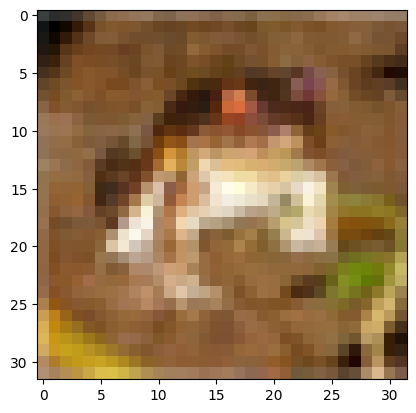

In [24]:
plt.imshow(x_train[0])

In [29]:
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten,Input

from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
28 * 28

784

In [26]:
32 *32 *3

3072

In [30]:
model = Sequential()
model.add(Input(shape=(32,32,3)))
#convlution layer
model.add(Conv2D(filters=32,kernel_size=(4,4),activation='relu'))
#pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
#convlution layer
model.add(Conv2D(filters=32,kernel_size=(4,4),activation='relu'))
#pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
#Flatten
model.add(Flatten())
#hidden layer
model.add(Dense(256,activation='relu'))
#output layer
model.add(Dense(10,activation='softmax'))


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [31]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 29, 29, 32)     │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       205,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,610 (881.29 KB)

 Trainable params: 225,610 (881.29 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
early_stop=EarlyStopping(monitor='val_loss',patience=3)

In [34]:
model.fit(x_train,y_cat_train,
          validation_data=(x_test,y_cat_test),
          epochs=15,callbacks=[early_stop])

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 37ms/step - accuracy: 0.3685 - loss: 1.7208 - val_accuracy: 0.5604 - val_loss: 1.2444
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 92s 43ms/step - accuracy: 0.5798 - loss: 1.1913 - val_accuracy: 0.5885 - val_loss: 1.1639
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 37ms/step - accuracy: 0.6419 - loss: 1.0261 - val_accuracy: 0.6369 - val_loss: 1.0454
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 36ms/step - accuracy: 0.6847 - loss: 0.9058 - val_accuracy: 0.6612 - val_loss: 0.9786
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.7229 - loss: 0.8000 - val_accuracy: 0.6698 - val_loss: 0.9546
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.7545 - loss: 0.7059 - val_accuracy: 0.6787 - val_loss: 0.9332
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.7788 - loss: 0.6298 - val_accuracy: 0.6633 - val_loss: 1.0003
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.8092 -

In [35]:
metrics = pd.DataFrame(model.history.history)

In [36]:
metrics.columns

Index(['accuracy', 'loss', 'val_accuracy', 'val_loss'], dtype='object')

<Axes: >

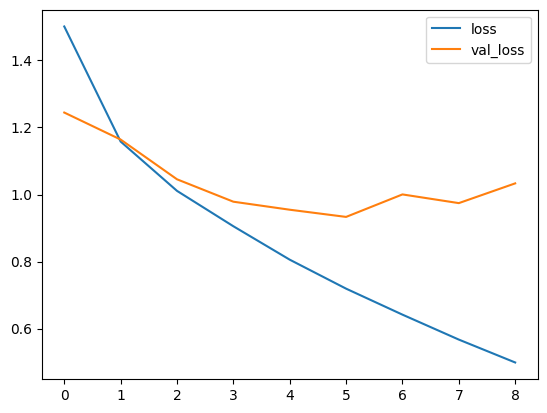

In [38]:
metrics[['loss', 'val_loss']].plot()

<Axes: >

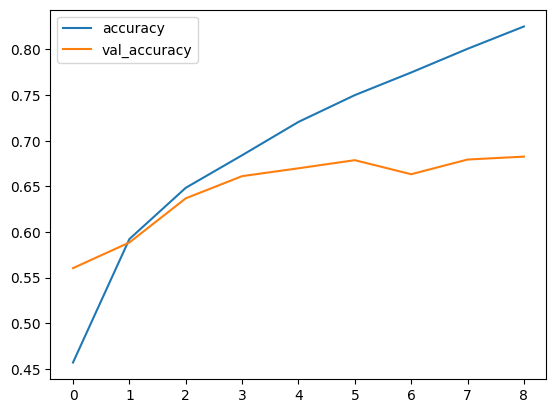

In [39]:
metrics[['accuracy', 'val_accuracy']].plot()

In [40]:
from sklearn.metrics import classification_report,confusion_matrix

In [85]:
# predictions=model.predict(x_test).argmax(axis=1)
predictions = np.argmax(model.predict(x_test), axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


In [86]:
predictions[0]

np.int64(3)

In [87]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.69      0.74      0.72      1000
           1       0.80      0.79      0.79      1000
           2       0.58      0.59      0.59      1000
           3       0.48      0.50      0.49      1000
           4       0.62      0.64      0.63      1000
           5       0.59      0.58      0.59      1000
           6       0.71      0.80      0.75      1000
           7       0.83      0.66      0.73      1000
           8       0.80      0.77      0.78      1000
           9       0.77      0.75      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



CIFAR10_CLASSES = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]


<Axes: >

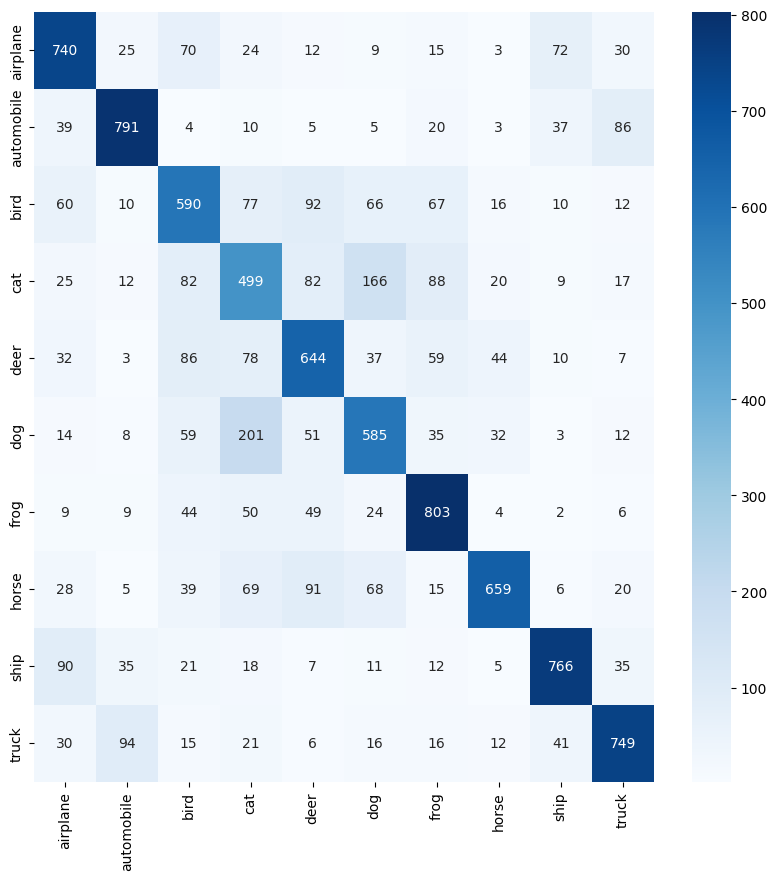

In [100]:
plt.figure(figsize=(10,10))

sns.heatmap(
    confusion_matrix(y_test, predictions),
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=CIFAR10_CLASSES,
    yticklabels=CIFAR10_CLASSES

)


In [89]:
model.evaluate(x_test,y_cat_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6910 - loss: 1.0158


[1.0331977605819702, 0.6826000213623047]

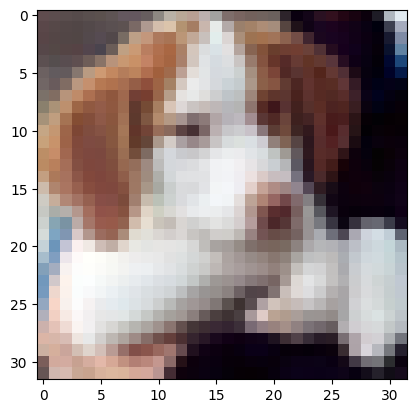

In [90]:
single_image=x_test[16]  #herre the image is already scaled else you have to scale it divide by 255

plt.imshow(single_image)

In [91]:
y_test[16]

array([5], dtype=uint8)

In [92]:
model.predict(single_image.reshape(1,32,32,3)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([5])

## checking the misclassfied images

In [72]:
CIFAR10_CLASSES = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]



In [94]:
def collect_misclassifications_from_arrays(model, x_test, y_test):
    preds = model.predict(x_test, verbose=0)
    pred_classes = np.argmax(preds, axis=1)

    misclassified = []

    for img, true, pred, conf in zip(
        x_test,
        y_test,
        pred_classes,
        np.max(preds, axis=1)
    ):
        if true != pred:
            misclassified.append({
                "image": img,
                "true_label": int(true.item() if hasattr(true, "item") else true),
                "pred_label": int(pred.item() if hasattr(pred, "item") else pred),
                "confidence": float(conf)
            })

    return misclassified


In [95]:
misclassified = collect_misclassifications_from_arrays(
    model, x_test, y_test
)


In [101]:
len(misclassified)



3174

In [102]:
import matplotlib.pyplot as plt

def imshow_actual_vs_pred(sample, class_names=CIFAR10_CLASSES):
    img = sample["image"]

    if img.max() > 1.0:
        img = img / 255.0

    true_label = class_names[sample["true_label"]]
    pred_label = class_names[sample["pred_label"]]

    plt.figure(figsize=(3, 3))
    plt.imshow(img)
    plt.axis("off")
    plt.title(
        f"True: {true_label}\nPred: {pred_label}",
        color="red"
    )
    plt.show()


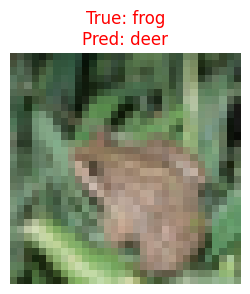

In [97]:
imshow_actual_vs_pred(misclassified[1])
